In [1]:
from rubin_sim.satellite_constellations import Satellite_avoid_basis_function
from rubin_sim.satellite_constellations import Model_observatory
import rubin_sim.satellite_constellations.sat_utils as sat_utils


import healpy as hp
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline


In [2]:
csfont = {'fontname':'Times New Roman'}

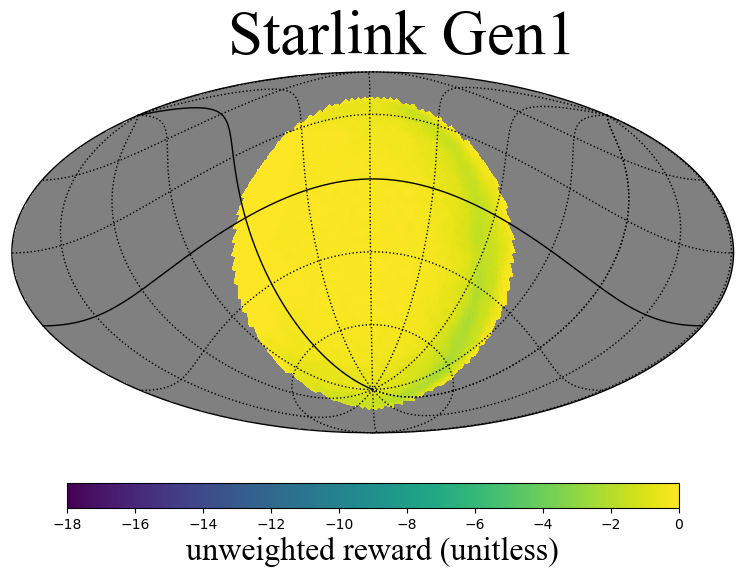

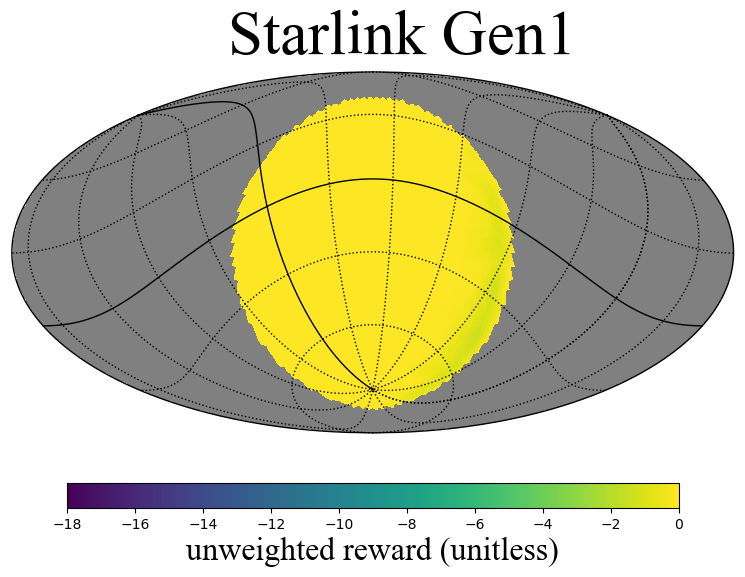

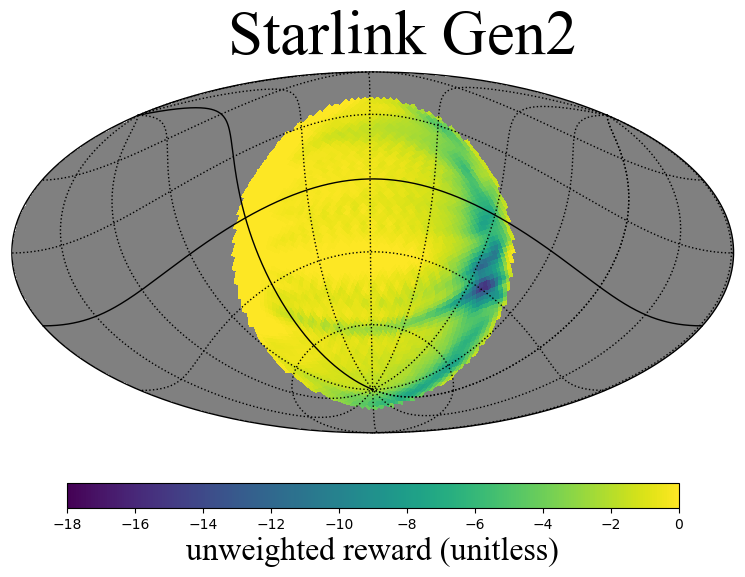

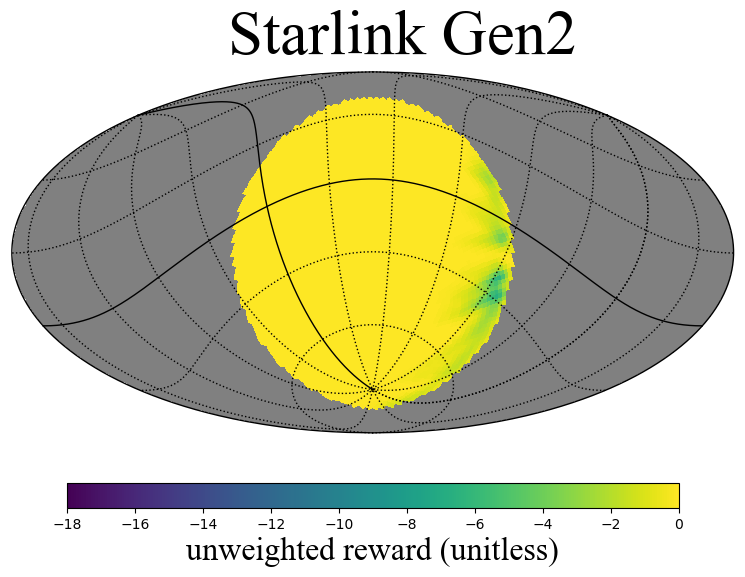

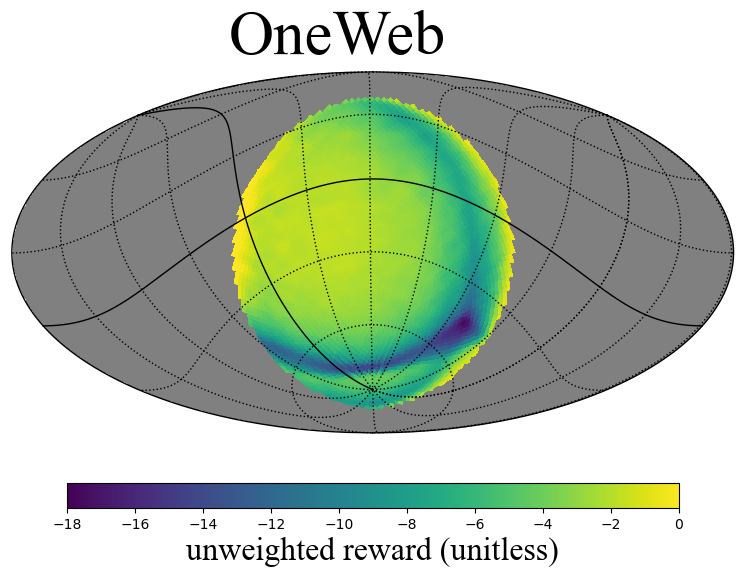

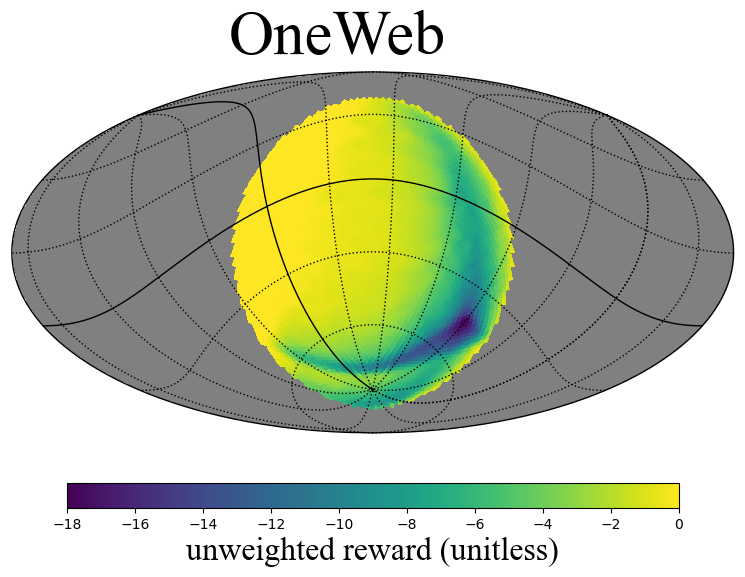

In [3]:

titles = {'starlink_tles_v1': 'Starlink Gen1',
          'starlink_tles_v2': 'Starlink Gen2',
          'oneweb_tles': 'OneWeb'}
# Takes a freaking long time to run, because the observatory is predicting things for a full night I think.
for constellation_name in ['starlink_tles_v1', 'starlink_tles_v2', 'oneweb_tles']:

    func = getattr(sat_utils, constellation_name)
    tles = func()
    constellation = sat_utils.Constellation(tles)
    
    mo = Model_observatory(constellation=constellation)
    for tstep in [0, .03]:
        mo.mjd += tstep
        conditions = mo.return_conditions()
        bf = Satellite_avoid_basis_function()
        sat_map = bf(conditions)
        
        below = np.where(conditions.alt < np.radians(20))[0]
        sat_map[below] = np.nan
        title = titles[constellation_name]
        # title += ' sun altitude=%.1f\u00B0' % np.degrees(conditions.sunAlt)
        hp.mollview(sat_map, rot=(conditions.lmst*180/12., conditions.site.latitude), title='', cbar=False, min=-18, max=0)
        # healpy failing on negative colorbar for some reason. That's a new one.
        ax = plt.gca()
        ax.text(-0.8,1.1,title,fontsize=45, **csfont)
        #if constellation_name=='starlink_tles_v1': 
        im = ax.get_images()[0]
        cb = plt.colorbar(im,
                            shrink=0.75,
                            aspect=25,
                            pad=0.1,
                            orientation="horizontal",
                            extendrect=True)
        cb.set_label('unweighted reward (unitless)',fontsize=23, **csfont)
        hp.graticule()
        plt.savefig(constellation_name+'_%.2f_basisfunc.pdf' % tstep, bbox_inches="tight")
        

/Users/yoachim/anaconda3/envs/guro/lib/python3.8/site-packages/matplotlib/transforms.py:2662: RuntimeWarning: divide by zero encountered in double_scalars
  x_scale = 1.0 / inw
/Users/yoachim/anaconda3/envs/guro/lib/python3.8/site-packages/matplotlib/transforms.py:2664: RuntimeWarning: invalid value encountered in double_scalars
  self._mtx = np.array([[x_scale, 0.0    , (-inl*x_scale)],
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


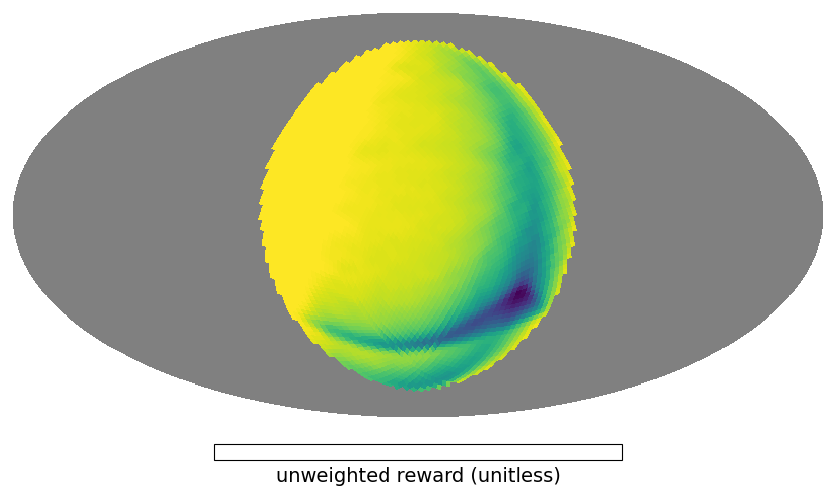

In [4]:
hp.mollview(sat_map, rot=(conditions.lmst*180/12., conditions.site.latitude),
                    title='', unit='unweighted reward (unitless)', min=-18, max=0)


In [5]:
'5\u00B0'

'5°'

In [6]:
sat_map = bf(conditions)
below = np.where(conditions.alt < np.radians(20))[0]
sat_map[below] = np.nan

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


Text(-0.8, 1.1, 'Starlink Gen1')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


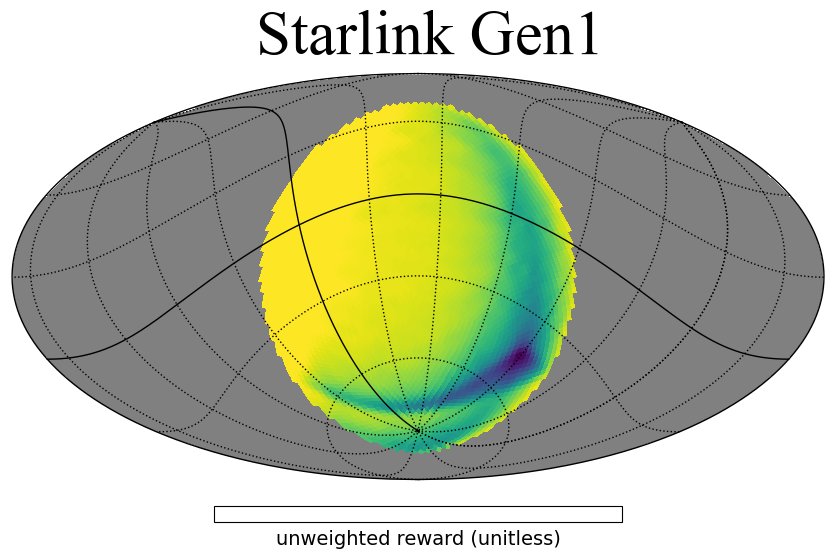

In [7]:

hp.mollview(sat_map, rot=(conditions.lmst*180/12., conditions.site.latitude),
                    title='', unit='unweighted reward (unitless)', min=-18, max=0)
title='Starlink Gen1'
hp.graticule()
ax = plt.gca()
ax.text(-0.8,1.1,title,fontsize=45, **csfont)

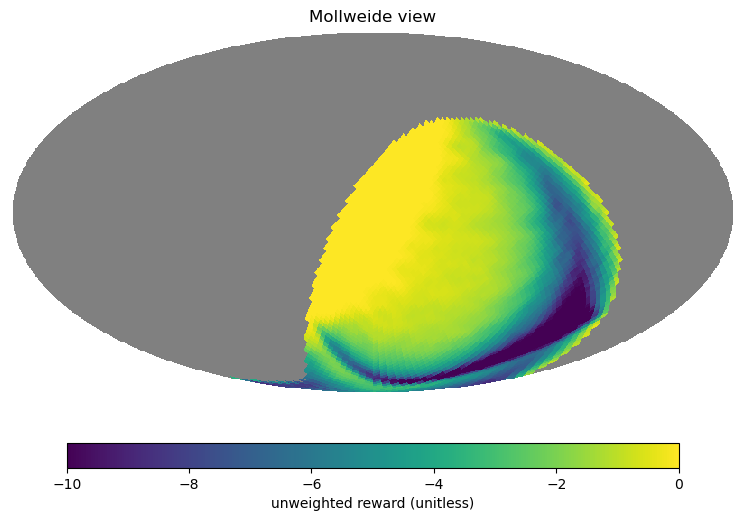

In [8]:
hp.mollview(sat_map, cbar=False, min=-10)
ax = plt.gca()
im = ax.get_images()[0]
cb = plt.colorbar(im,
                    shrink=0.75,
                    aspect=25,
                    pad=0.1,
                    orientation="horizontal",
                    extendrect=True)
cb.set_label('unweighted reward (unitless)')
#fig.colorbar(ax)
#cbar = fig.colorbar(ax, ticks=[-1, 0, 1], orientation='horizontal')